# 常用指标和绘图展示

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


%matplotlib inline
%run tick2bar.ipynb


from typing import List, Tuple, Any

import pandas as pd

In [2]:
# mplfinance settings.
mpf_color = mpf.make_marketcolors(
    up='red',  # 上涨K线的颜色
    down='green',  # 下跌K线的颜色
    inherit=True
)

mpf_style = mpf.make_mpf_style(
    marketcolors=mpf_color,
    rc={
        'font.family': 'SimHei',       # 指定默认字体：解决plot不能显示中文问题
        'axes.unicode_minus': False,  # 解决保存图像是负号'-'显示为方块的问题
    }
)

indicator_colors: List[str] = ['black', 'royalblue', 'magenta', 'darkgreen', 'grey', 'red', 'orange', 'darkgoldenrod', 'purple', 'lightseagreen']

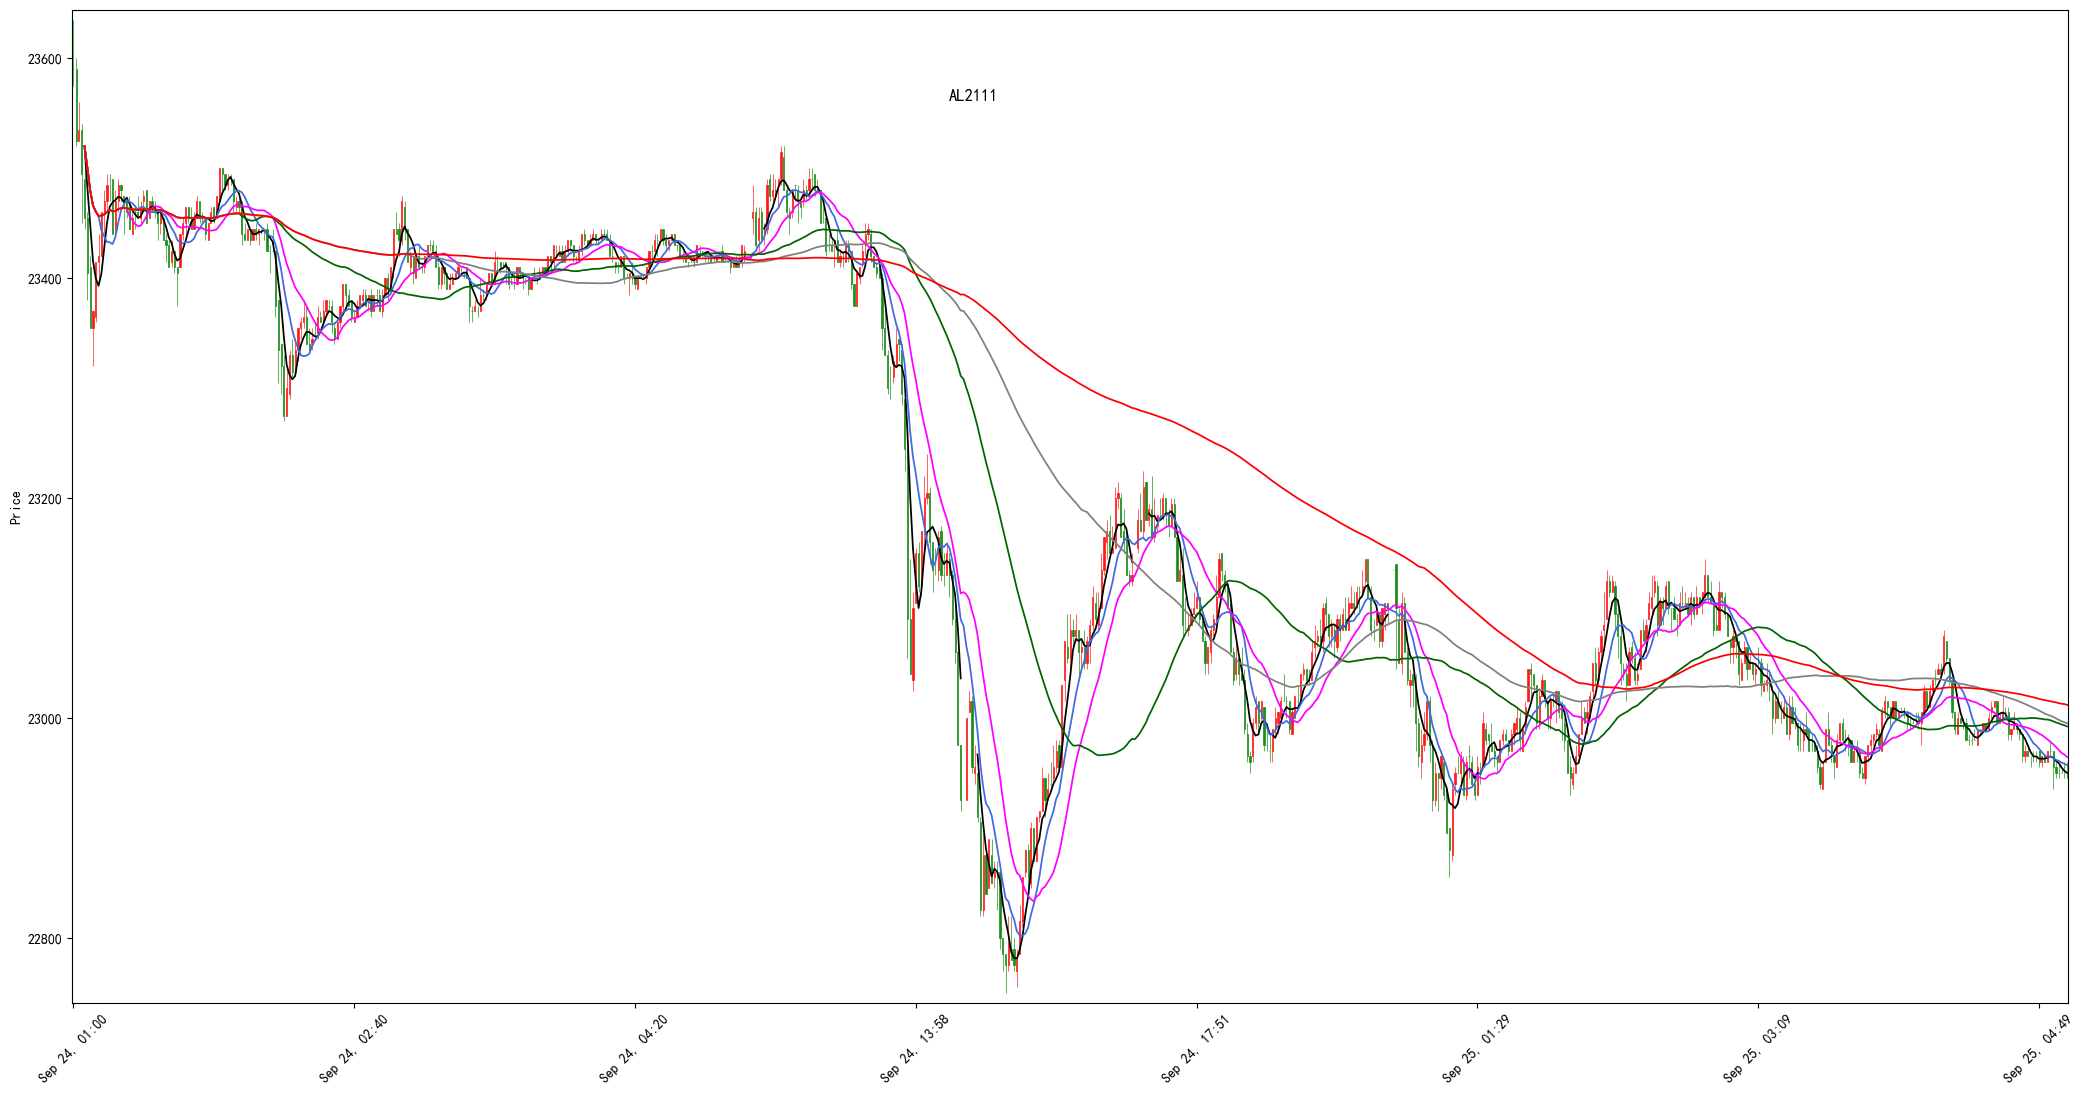

In [3]:
# 均线。
def ma(df: pd.DataFrame, period_list: List[int]) -> pd.DataFrame:
    result: pd.DataFrame = df.copy()
    label: str
    for period in period_list:
        label = f'ma{str(period)}'
        result[label] = df['close'].rolling(period, min_periods=5).mean()
    return result

# 绘图数据筛选。
df_plot = df_1min.loc['2021-09-24 01:00:00.000000':, :]

# 均线参数组。
ma_period_list: List[int] = [5, 10, 20, 60, 120, 240]

# 指标数据生成。
df_plot = ma(df_plot, ma_period_list)

# 指标添加。
parameters: List[Tuple[str, str]] = [(f'ma{str(ma_period_list[i])}', indicator_colors[i]) for i in range(len(ma_period_list))]
indicator = [
    mpf.make_addplot(
        df_plot[parameters[i][0]],
        color=parameters[i][1]
    ) for i in range(len(ma_period_list))
]
# 上面的写法就是自动循环的下面的写法。
# indicator = [
#     mpf.make_addplot(df_plot['ma5'], color='k'),
#     mpf.make_addplot(df_plot['ma20'], color='b'),
# ]

# 画图。
mpf.plot(
    df_plot,
    addplot=indicator,
    title='AL2111',
    type='candle',
    volume=False,
    show_nontrading=False,
    # mav=(5, 10, 20, 60, 120, 240),
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True,
    warn_too_much_data=2000
)

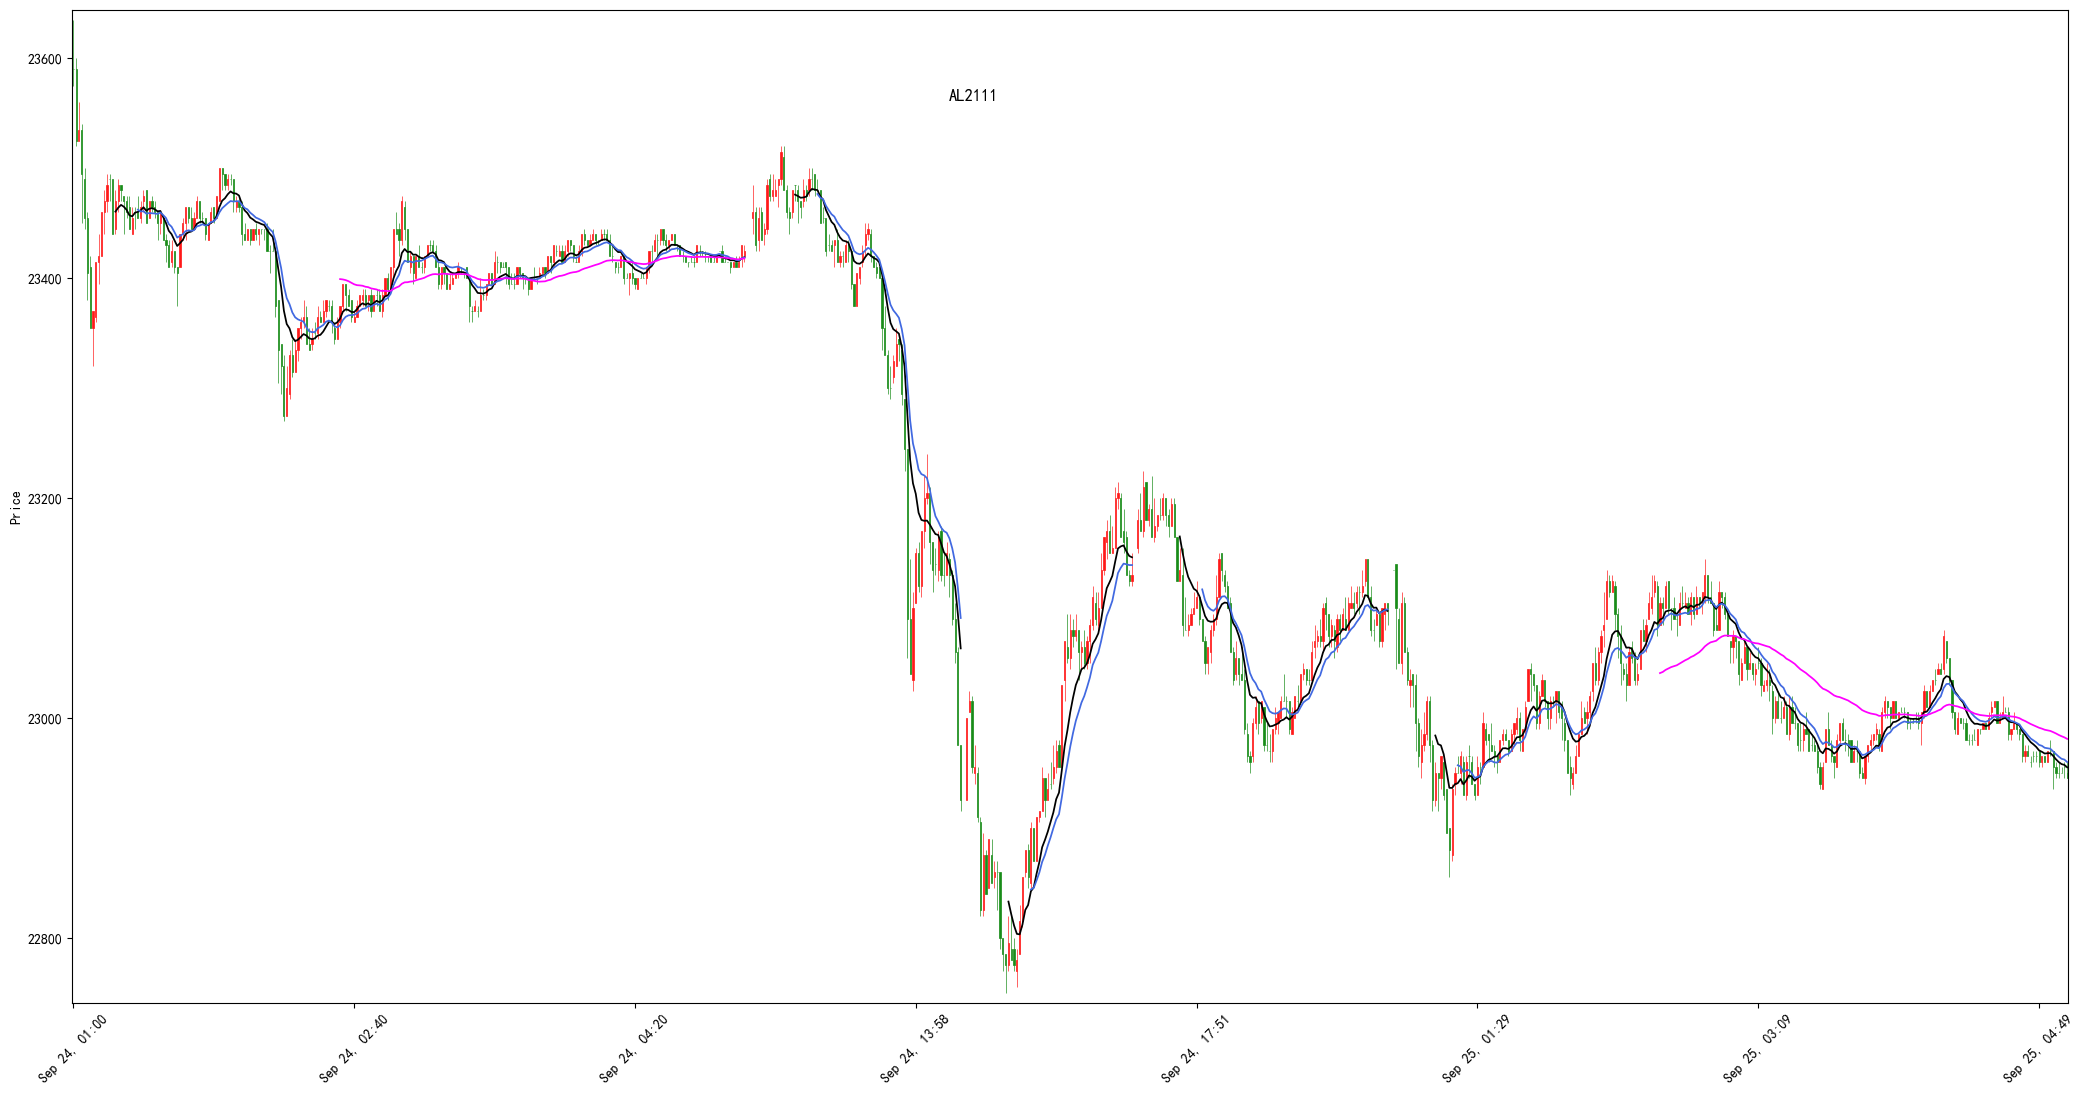

In [4]:
# 瀑布线。
def pbx(df: pd.DataFrame, period_list: List[int]) -> pd.DataFrame:
    """
    Add PBX indicator.
    """
    result: pd.DataFrame = df.copy()
    
    label: str
    for period in period_list:
        label = f'pbx{str(period)}'
        result[label] = (
            df['close'].ewm(span=period, adjust=False).mean() +
            df['close'].rolling(period*2).mean() +
            df['close'].rolling(period*4).mean()
        ) / 3

    return result

# 绘图数据筛选。
df_plot = df_1min.loc['2021-09-24 01:00:00.000000':, :]

# 均线参数组。
pbx_period_list: List[int] = [4, 6, 24]

# 指标数据生成。
df_plot = pbx(df_plot, pbx_period_list)

# 指标添加。
parameters: List[Tuple[str, str]] = [(f'pbx{str(pbx_period_list[i])}', indicator_colors[i]) for i in range(len(pbx_period_list))]
indicator = [
    mpf.make_addplot(
        df_plot[parameters[i][0]],
        color=parameters[i][1]
    ) for i in range(len(pbx_period_list))
]

# 画图。
mpf.plot(
    df_plot,
    addplot=indicator,
    title='AL2111',
    type='candle',
    volume=False,
    show_nontrading=False,
    # mav=(5, 10, 20, 60, 120, 240),
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True,
    warn_too_much_data=2000
)

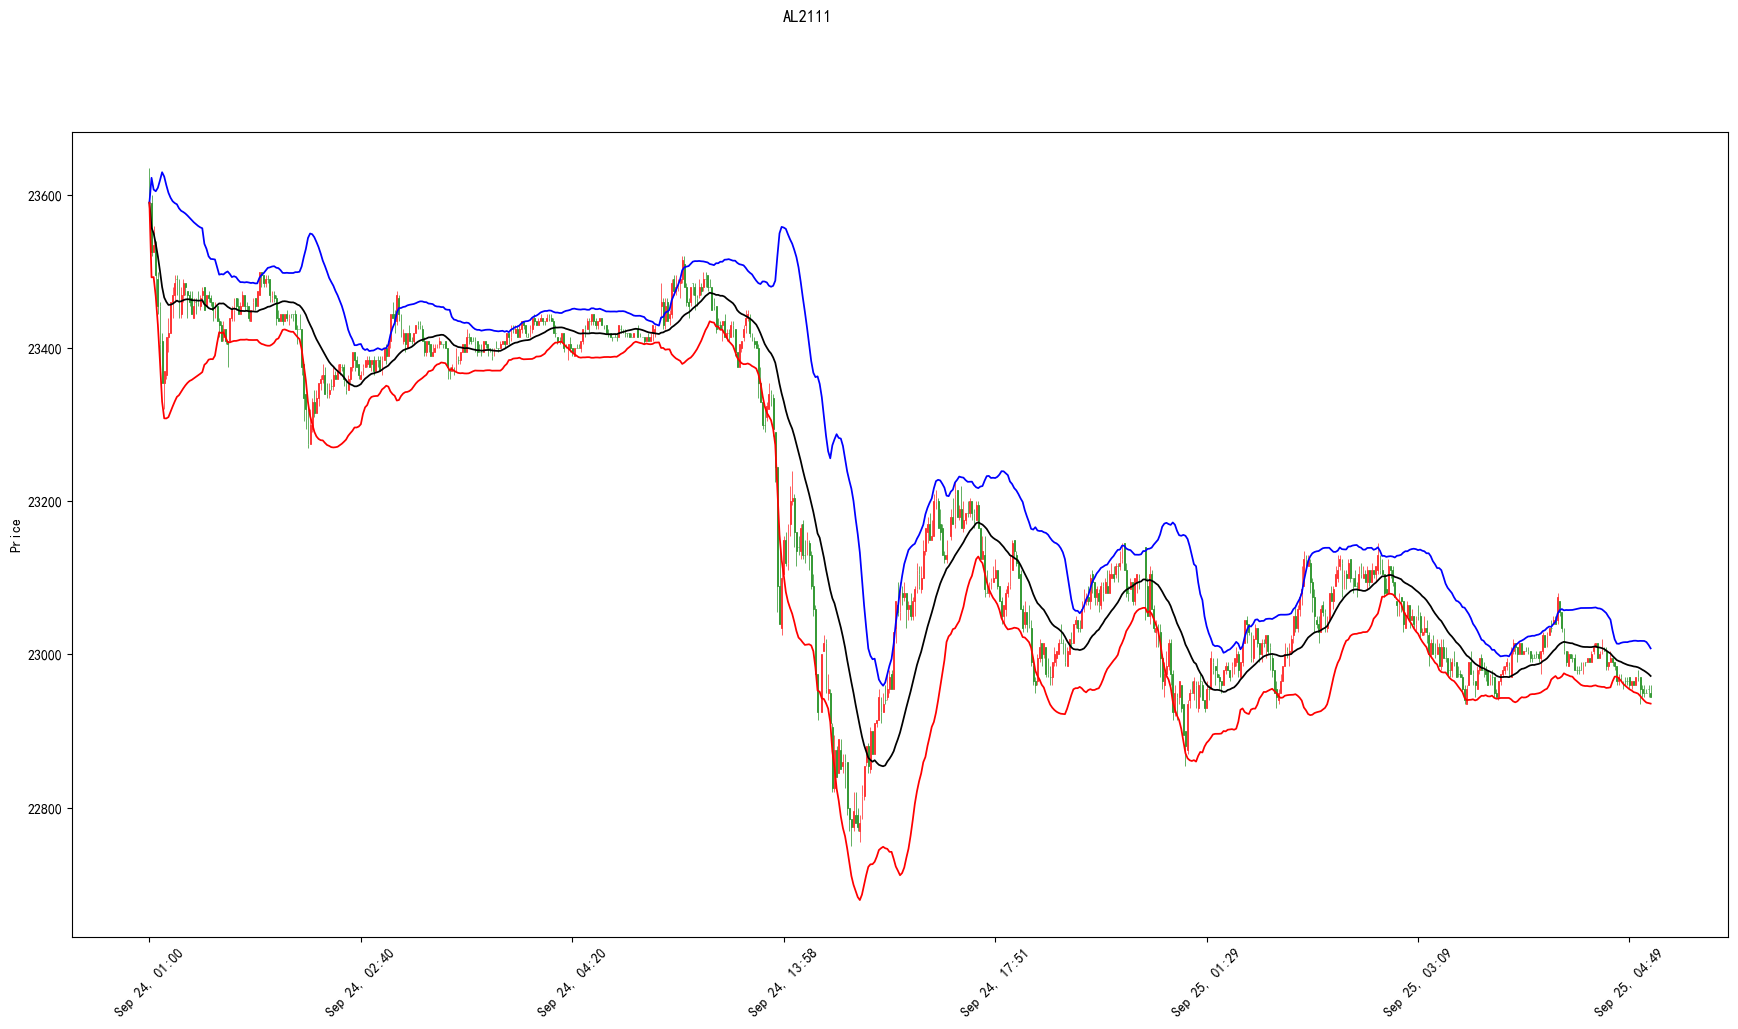

In [5]:
# 布林带。
def boll(df: pd.DataFrame, n: int, m: int) -> pd.DataFrame:
    """
    Add BOLL indicator.
    """
    result: pd.DataFrame = df.copy()
    # 标准差
    result['std'] = df['close'].rolling(n, min_periods=1).std(ddof=0)
    # 中轨
    result['median'] = df['close'].rolling(n, min_periods=1).mean()
    # 上下轨
    result['upper'] = result['median'] + result['std'] * m
    result['lower'] = result['median'] - result['std'] * m
    return result

# 绘图数据筛选。
df_plot = df_1min.loc['2021-09-24 01:00:00.000000':, :]

# 指标数据生成。
df_plot = boll(df_plot, 26, 2)

# 指标添加。
indicator = [
    mpf.make_addplot(df_plot['median'], color='k'),
    mpf.make_addplot(df_plot['upper'], color='b'),
    mpf.make_addplot(df_plot['lower'], color='r'),
]

# 画图。
mpf.plot(
    df_plot,
    addplot=indicator,
    title='AL2111',
    type='candle',
    volume=False,
    show_nontrading=False,
    # mav=(5, 10, 20, 60, 120, 240),
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=False,
    warn_too_much_data=2000
)